# Attribute Exploration and feature discovery  on merchants_df

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eda_fe_module as eda_fe
import pickle
from scipy import stats

In [2]:
## Making this  lambda functions globally accessible
mode_lambda_func = lambda x : stats.mode(x)[0][0]
nunique_lambda_func = lambda x : x.nunique()
count_lambda_func = lambda x : len(x)
min_lambda_func = lambda x : x.value_counts().index[-1]
max_lambda_func = lambda x : x.value_counts().index[0]

In [3]:
def getPercentageOfNullEntries(df,col):
    """
    Input : df : dataFrame whose column has to be checked for null values
           col : column name
    Output : 
        prints number of null values and percentage of null entries
    """
    null_values = df[col].isnull().sum()
    print("Number of null entries : ",null_values)
    print("Percentage of null entries : ",(null_values*100)/df.shape[0])

In [2]:
merchants_df = pd.read_csv('merchants.csv')

In [5]:
merchants_df.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [6]:
merchants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   merchant_id                  334696 non-null  object 
 1   merchant_group_id            334696 non-null  int64  
 2   merchant_category_id         334696 non-null  int64  
 3   subsector_id                 334696 non-null  int64  
 4   numerical_1                  334696 non-null  float64
 5   numerical_2                  334696 non-null  float64
 6   category_1                   334696 non-null  object 
 7   most_recent_sales_range      334696 non-null  object 
 8   most_recent_purchases_range  334696 non-null  object 
 9   avg_sales_lag3               334683 non-null  float64
 10  avg_purchases_lag3           334696 non-null  float64
 11  active_months_lag3           334696 non-null  int64  
 12  avg_sales_lag6               334683 non-null  float64
 13 

In [7]:
## Checks number of null values in each of the column
merchants_df.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

### 1. Objective : In the below cell we check for the rows which have all 13 entries for avg_sales_lag as null

In [7]:
merchants_df.loc[(merchants_df['avg_sales_lag3'].isnull()) & (merchants_df['avg_sales_lag6'].isnull()) & (merchants_df['avg_sales_lag12'].isnull())]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,3.666667,6,NaN,3.833333,12,Y,160,21,5.0
6,M_ID_bfd41933db,33861,792,9,-0.057471,-0.057471,N,E,E,NaN,...,NaN,4.833333,6,NaN,6.333333,12,N,60,16,1.0
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.666667,6,NaN,1.500000,11,Y,-1,-1,NaN
8,M_ID_c5b389236d,37179,813,29,-0.057471,-0.057471,N,E,E,NaN,...,NaN,189.916667,6,NaN,197.000000,7,N,248,15,1.0
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.000000,2,NaN,1.000000,2,Y,-1,-1,NaN
10,M_ID_492cfa500c,13462,369,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,inf,6,NaN,inf,12,N,-1,9,1.0
11,M_ID_73487fed26,17123,427,27,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,inf,6,NaN,inf,12,Y,-1,-1,NaN
12,M_ID_7149162139,2118,63,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,inf,6,NaN,inf,12,Y,88,16,1.0


## Analysis
* For the merchants_df data all three columns are NAN for same set of rows.
* Number of rows with these null values is very less.

## Conclusion 
* We may simply drop these rows.

In [32]:
## Reducing size of dataframe
merchants_df = eda_fe.reduce_mem_usage(merchants_df)

Mem. usage decreased to 30.32 Mb (46.0% reduction)


## 2. Importing train data

In [4]:
train_df = pd.read_csv('train.csv')

* Like in Historical transactions we will only consider the range of target score which can help us have a zoomed in look into the dataset.
* It will help us study and analyze the relation of aggregated features with target score.
* nout_train_df is a sample of train_df.

In [5]:
train_df['act_target'] = 2**train_df['target']
nout_train_df = train_df[(train_df['act_target'] >= -2) & (train_df['act_target'] <= 2)]
nout_train_df = nout_train_df[['card_id','act_target']]
print("% of data used for train_df : ",nout_train_df.shape[0]*100/train_df.shape[0])

% of data used for train_df :  79.74415230020256


* nout_train_df contains about 80% of the train data.

In [10]:
## For EDA purpose we'll be only dealing with train_df and hence we'll delete train_df and just use nout_train_df
del(train_df)

## 3. Some important points before we proceed with our analysis
* For analysis with target variable, we require to merge our aggregated information with card_id in train_df.
* Merchants_df doesn't have a card_id field in it and cannot be directly merged with train_df.
* Historical transactions have card_id,merchant_id,merchant_category_id and subsector_id.
* Information can be aggregated at various levels using the above merchant fields and then be combined with historical transactions so that it can later be merged with train_df but problem with this approach is that we have to perform multiple levels of aggregation. 
* Or we can simply perform inner join on the above common fields and merge the historical transactions and merchants transactions.
* This can help us perform aggregation on just level in the merged_dataframe on card_id.

## Let's first pick only those transactions from historical transactions whose card_id's are present in train_df
* Here we will first select card_ids's from train_df with no outliers.(nout_train_df) 
* We'll sample the historical transaction dataset using the above card_id's.(s_hist_df)
* We'll then create a new merged dataframe by performing inner join on s_hist_df and merchants_df with common keys(card_id,merchant_id,merchant_category_id,subsector_id) in both the dataset.

In [3]:
hist_df = eda_fe.reduce_mem_usage(pd.read_csv('historical_transactions.csv'))

Mem. usage decreased to 1749.11 Mb (43.7% reduction)


In [25]:
hist_df.shape

(29112361, 14)

In [6]:
## Selecting card_id's from nout_train_df
card_ids = nout_train_df['card_id'].unique()
s_hist_df = eda_fe.createSampledHistDf(hist_df,card_ids,sortby = ['card_id'])
s_hist_df.shape[0]

15308718

In [7]:
## Percentage of data after sampling Historical transactions
print("Percentage of data considered after sampling : ",(s_hist_df.shape[0]*100)/hist_df.shape[0])

Percentage of data considered after sampling :  52.58494149615691


In [8]:
## Only collecting subset of information that will be required for merging with transactions data
s_hist_df = s_hist_df[['card_id','merchant_id','merchant_category_id','subsector_id']]

In [9]:
##  Since we'll use sampled historical transactions datafframe for our analysis
##  We'll delete hist_df and retain s_hist_df
del(hist_df)

In [10]:
## Creating the merge_df which we'll be using throughout the notebook
merge_df = pd.merge(s_hist_df,merchants_df,how='inner',left_on=['merchant_id','merchant_category_id','subsector_id'],right_on=['merchant_id','merchant_category_id','subsector_id'])

In [34]:
print("Dimensions of merge_df : ",merge_df.shape)

Dimensions of merge_df :  (13300614, 23)


In [35]:
print("Percentage of sampled historical transactions retained after inner join : ",(merge_df.shape[0]*100)/s_hist_df.shape[0])

Percentage of sampled historical transactions retained after inner join :  86.88261159425629


In [21]:
merge_df.head()

,card_id,merchant_id,merchant_category_id,subsector_id,merchant_group_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,C_ID_00007093c1,M_ID_9400cf2342,307,19,60307,-0.047556,-0.057471,N,D,D,...,0.96,0.959246,6,1.02,0.99042,12,N,-1,2,3.0
1,C_ID_00007093c1,M_ID_9400cf2342,307,19,60307,-0.047556,-0.057471,N,D,D,...,0.96,0.959246,6,1.02,0.99042,12,N,-1,2,3.0
2,C_ID_00007093c1,M_ID_9400cf2342,307,19,60307,-0.047556,-0.057471,N,D,D,...,0.96,0.959246,6,1.02,0.99042,12,N,-1,2,3.0
3,C_ID_00007093c1,M_ID_9400cf2342,307,19,60307,-0.047556,-0.057471,N,D,D,...,0.96,0.959246,6,1.02,0.99042,12,N,-1,2,3.0
4,C_ID_00007093c1,M_ID_9400cf2342,307,19,60307,-0.047556,-0.057471,N,D,D,...,0.96,0.959246,6,1.02,0.99042,12,N,-1,2,3.0


## Let's perform all our aggregation on card_id as we did before
* first let's look at new attributes in merchants.csv which has not been seen in any of the previous data table.
* most_recent_sales_range
* most_recent_purchases_range

* avg_sales_lag3
* avg_sales_lag6
* avg_sales_lag12

* avg_purchases_lag3
* avg_purchases_lag6
* avg_purchases_lag12

* active_months_lag3
* active_months_lag6
* active_months_lag12

### Creating cells for dumping and loading merge dataframe

In [11]:
sampleFile = open('merchants_merge_df','wb')
pickle.dump(merge_df,sampleFile)
sampleFile.close()

In [5]:
sampleFile = open('merchants_merge_df','rb')
merge_df = pickle.load(sampleFile)
sampleFile.close()

## 4.1 Objective : Explore most_recent_sales_range

In [25]:
merge_df['most_recent_sales_range'].unique()

array(['D', 'B', 'A', 'C', 'E'], dtype=object)

In [26]:
getPercentageOfNullEntries(merge_df,'most_recent_sales_range')

Number of null entries :  0
Percentage of null entries :  0.0


In [13]:
merge_df['most_recent_sales_range'].value_counts()

A    5550073
C    4346086
D    3385948
B    3376383
E    2041631
Name: most_recent_sales_range, dtype: int64

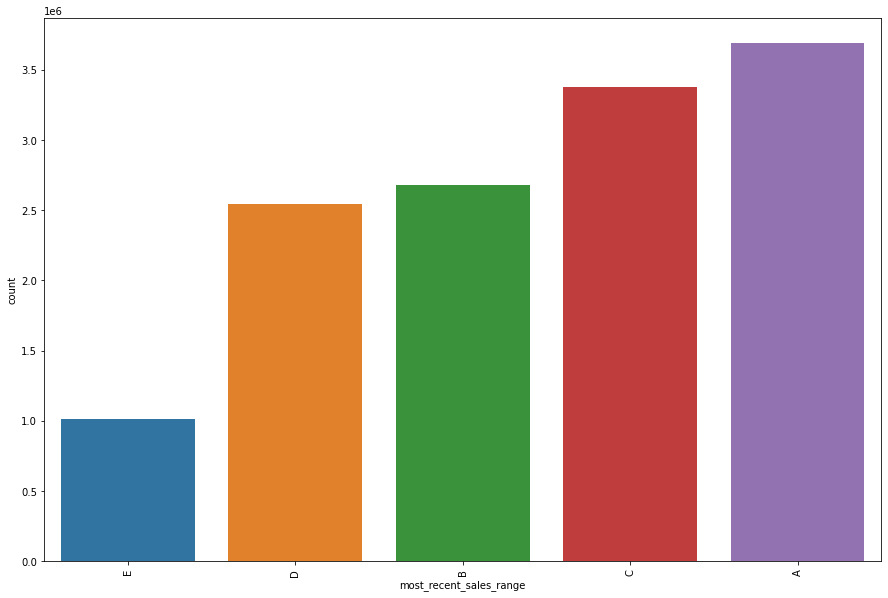

In [29]:
eda_fe.plotBarPlot(merge_df,'most_recent_sales_range')

## Analysis
* Maximum number of category in the most_recent_sales_range is 'A'
* Minimum number of category is 'E'.

## Conclusion
* We can use this information to create min and max features on above attribute.

## 4.2 Objective : Check relation of aggregated feature on most_recent_sales_range with target variable
* Aggregation that we'll be looking at is statistical mode and nunique(number of unique categories) grouped by card_id.

In [37]:
recent_sales_range_mode = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'most_recent_sales_range',mode_lambda_func,'mode')
recent_sales_range_nunique = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'most_recent_sales_range',nunique_lambda_func,'nunique')

In [36]:
recent_sales_range_min = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'most_recent_sales_range',min_lambda_func,'min')
recent_sales_range_max = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'most_recent_sales_range',max_lambda_func,'max')

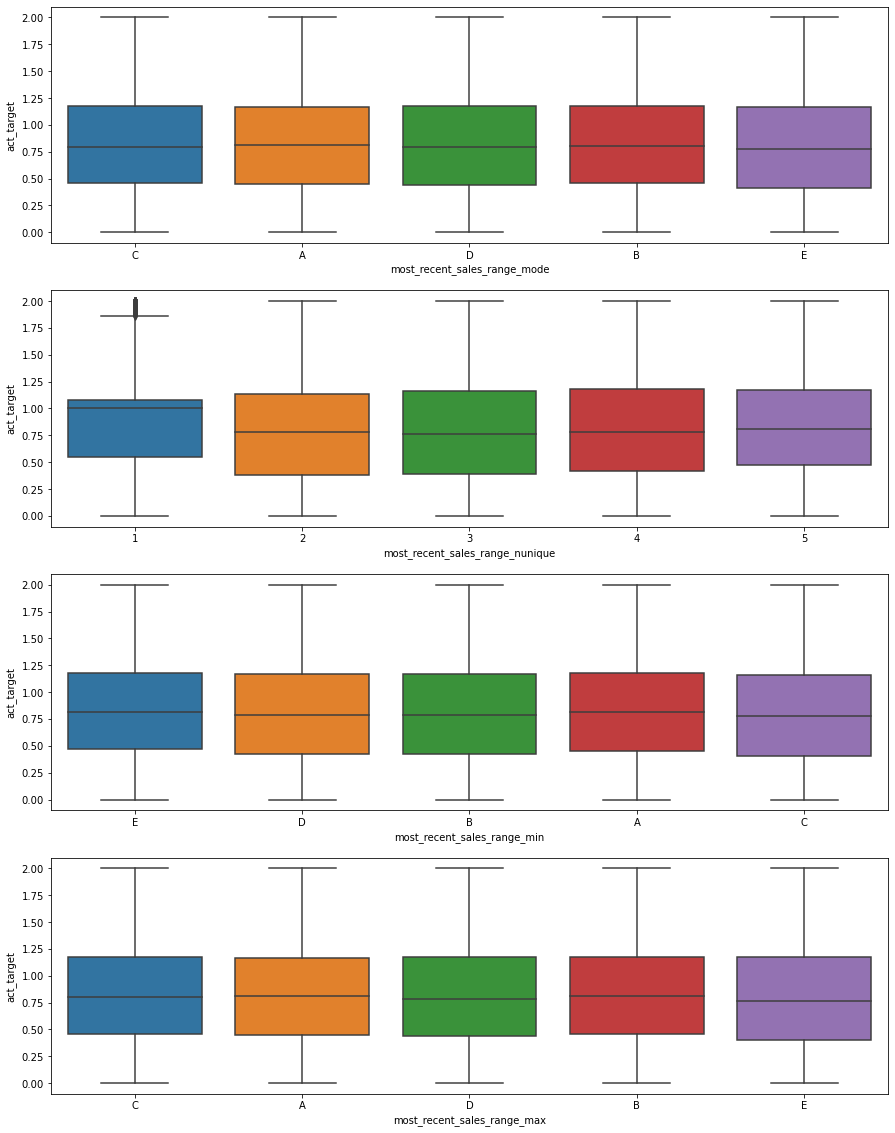

In [38]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows = 4,ncols = 1,figsize = (15,20))
sns.boxplot('most_recent_sales_range_mode','act_target',data = recent_sales_range_mode,ax = ax1)
sns.boxplot('most_recent_sales_range_nunique','act_target',data = recent_sales_range_nunique,ax = ax2)
sns.boxplot('most_recent_sales_range_min','act_target',data = recent_sales_range_min,ax = ax3)
sns.boxplot('most_recent_sales_range_max','act_target',data = recent_sales_range_max,ax = ax4)

## Analysis
* Mode feature doesn't show any variation in distribution of target variable.
* Nunique feature on the above attribute shows variation in distribution of target variable.
* Min Max aggregates show no variation wrt target variable.

## Conclusion
* We'll add the above aggregated features to our feature set.
* Though exploration shows us that some of them are not useful, we'll still wait till the feature selection stage to decide upon anything.

## 5.1 Objective : Explore most_recent_purchase_range

In [32]:
getPercentageOfNullEntries(merge_df,'most_recent_purchases_range')

Number of null entries :  0
Percentage of null entries :  0.0


In [33]:
merge_df['most_recent_purchases_range'].value_counts()

A    3939613
C    3527214
B    2617839
D    2477005
E     738943
Name: most_recent_purchases_range, dtype: int64

In [34]:
## Replacing with most frequent value
merge_df['most_recent_purchases_range'].fillna('A',inplace=True)

So we don't need imputation of null values 

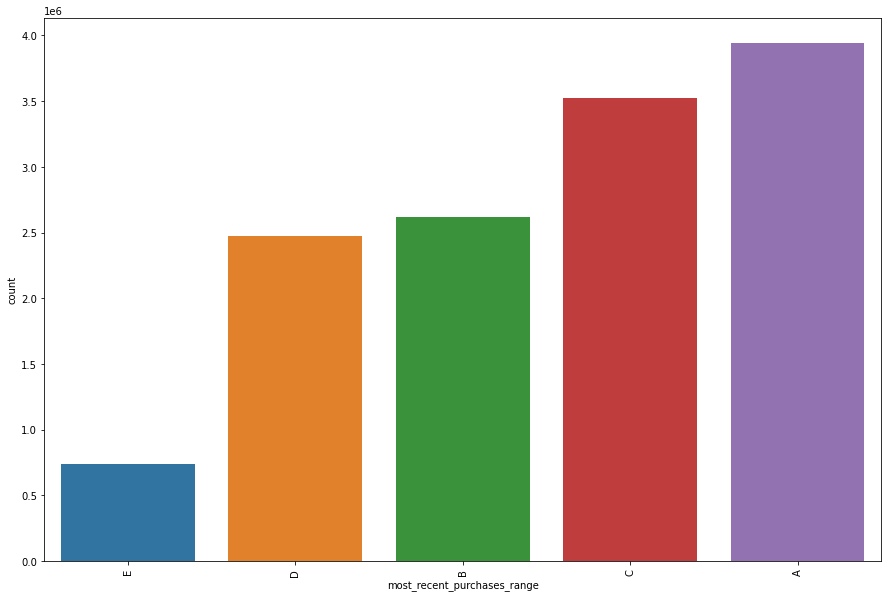

In [35]:
eda_fe.plotBarPlot(merge_df,'most_recent_purchases_range')

## Analysis
* Category 'A' has the highest frequency while category 'E' has the lowest frequency.

## 5.2 Objective : Check relation of aggregated feature on most_recent_purchases_range with target variable

In [36]:
recent_purchases_range_mode = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'most_recent_purchases_range',mode_lambda_func,'mode')
recent_purchases_range_nunique = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'most_recent_purchases_range',nunique_lambda_func,'nunique')

In [49]:
recent_purchases_range_count = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'most_recent_purchases_range',count_lambda_func,'count')

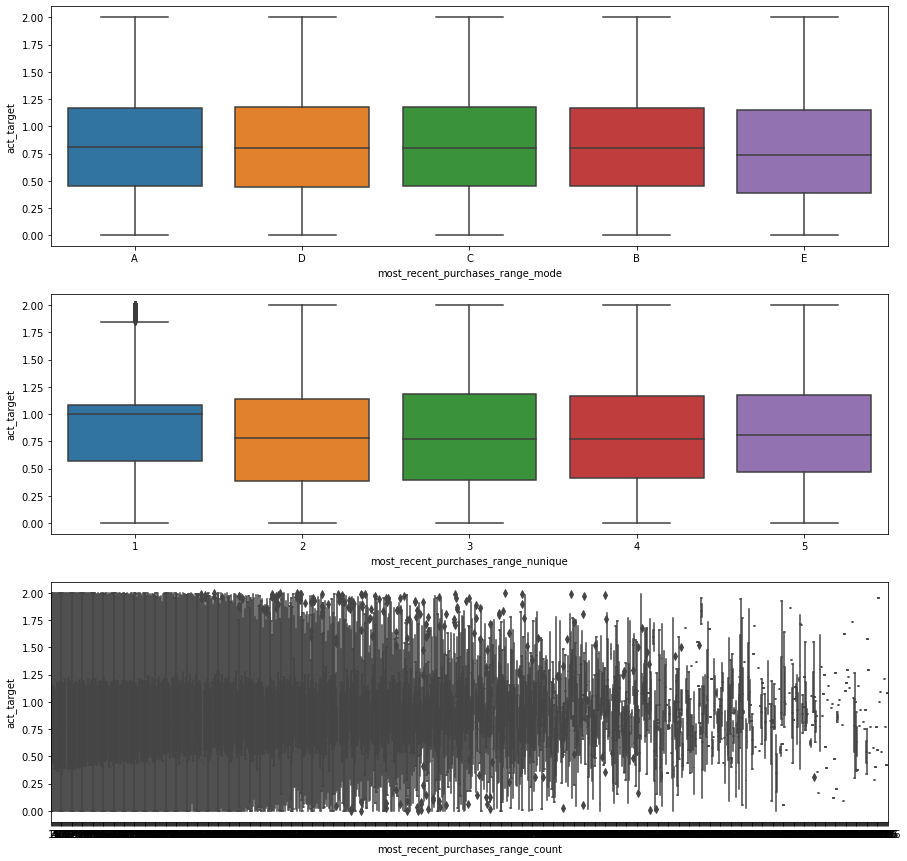

In [51]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
sns.boxplot('most_recent_purchases_range_mode','act_target',data = recent_purchases_range_mode,ax = ax1)
sns.boxplot('most_recent_purchases_range_nunique','act_target',data = recent_purchases_range_nunique,ax = ax2)
sns.boxplot('most_recent_purchases_range_count','act_target',data = recent_purchases_range_count,ax = ax3)

## Analysis
* It's same as that of most_recent_sales_range.
* We tried with a new aggregation of count. It returned a continuous valued feature.
* Checked for pearson correlation with target variable,it came out to be very low.

In [54]:
abs(recent_purchases_range_count.corr())[['act_target']].T

,act_target,most_recent_purchases_range_count
act_target,1.0,0.043186


## 6.1 Objective : Explore Average sales lag

In [55]:
getPercentageOfNullEntries(merge_df,'avg_sales_lag3')

Number of null entries :  4461
Percentage of null entries :  0.03353980500449077


In [56]:
## Checking for different quantile range values
np.percentile(merge_df['avg_sales_lag3'].notnull().values,q=[0,25,50,75,90,95,99])

array([0., 1., 1., 1., 1., 1., 1.])

All of the values beyond 25th percentile are 1

In [57]:
print(np.percentile(merge_df['avg_sales_lag3'].notnull().values,q=[0,5,10,15,20,25]))
print(np.percentile(merge_df['avg_sales_lag3'].notnull().values,q=[0,1,2,3,4,5]))

[0. 1. 1. 1. 1. 1.]
[0. 1. 1. 1. 1. 1.]


## 6.1.1  Objective : To check distribution of avg_sales_lag3

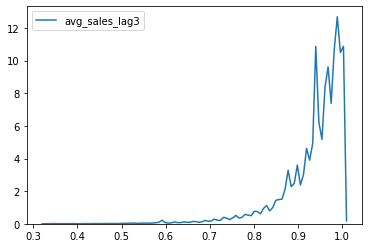

In [58]:
sns.kdeplot(merge_df[(merge_df['avg_sales_lag3'] <= 1) & (merge_df['avg_sales_lag6'] >= -1)]['avg_sales_lag3'])

## Analysis
* The values are left skewed.
* Majority of the values are centered around 1.

## 6.1.2 Function ot calculate aggregate on numerical features

In [59]:
def createNumericalAggr(df,groupby_cat,num_feat):
    """
        Input : 
            df : DataFrame to be used for operation
    groupby_cat: Column to be used for groupby
       num_feat: Feature across which aggregation will be performed 
    
    returns aggregated features with min,max,median,sum and standard-deviation
    """
    
    aggr_funcs = ['min','max','median','sum','std']
    aggr_dict = {num_feat : aggr_funcs}
    aggr_df = df.groupby([groupby_cat]).agg(aggr_dict).reset_index()
    aggr_df.columns = ['_'.join(col).strip('_') for col in aggr_df.columns.values]
    return aggr_df

## 6.1.3 Check correlation of aggregated features on average sales lag with target variable
* We'll be doing min,max,median,sum and standard-deviation aggregation on average sales and check it's correlation with target variable.
* We'll be following the same procedure throughout the notebook for all our numerical features.

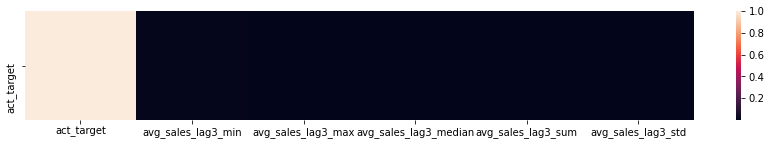

In [60]:
avg_sales_lag3_df = createNumericalAggr(merge_df,'card_id','avg_sales_lag3')
sales_lag3_df = pd.merge(nout_train_df,avg_sales_lag3_df,on='card_id',how='left')
fig,ax = plt.subplots(figsize=(15,2))
sns.heatmap(abs(sales_lag3_df.corr())[['act_target']].T,ax=ax)

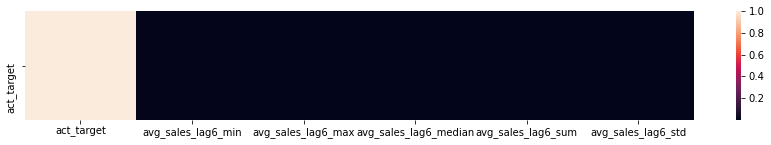

In [61]:
avg_sales_lag6_df = createNumericalAggr(merge_df,'card_id','avg_sales_lag6')
sales_lag6_df = pd.merge(nout_train_df,avg_sales_lag6_df,on='card_id',how='left')
fig,ax = plt.subplots(figsize=(15,2))
sns.heatmap(abs(sales_lag6_df.corr())[['act_target']].T,ax=ax)

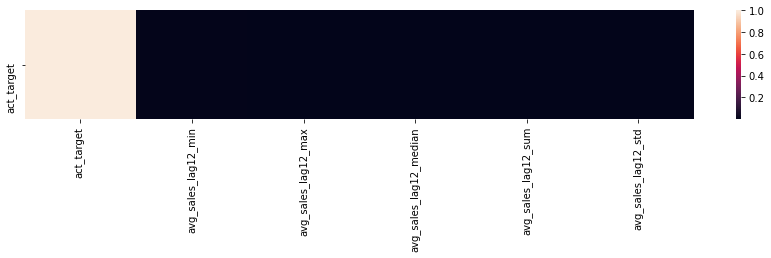

In [62]:
avg_sales_lag12_df = createNumericalAggr(merge_df,'card_id','avg_sales_lag12')
sales_lag12_df = pd.merge(nout_train_df,avg_sales_lag12_df,on='card_id',how='left')
fig,ax = plt.subplots(figsize=(15,2))
sns.heatmap(abs(sales_lag12_df.corr())[['act_target']].T,ax=ax)

## Analysis
* We saw very low correlation of aggregated features with target variable.
* This aggregation won't be of any use to our feature set.

## 7.1 Objective : Explore Average Purchase Lags
* Analysis objective and method is same as average sales lags

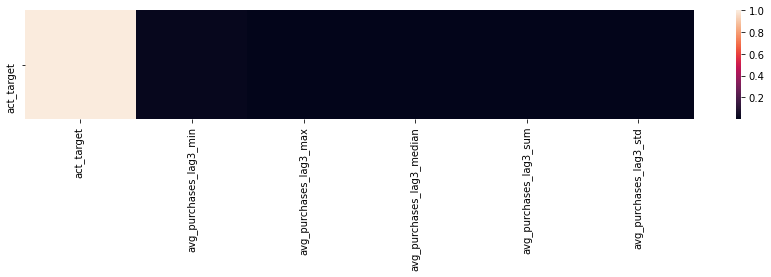

In [63]:
avg_purchases_lag3_df = createNumericalAggr(merge_df,'card_id','avg_purchases_lag3')
purchases_lag3_df = pd.merge(nout_train_df,avg_purchases_lag3_df,on='card_id',how='left')
fig,ax = plt.subplots(figsize=(15,2))
sns.heatmap(abs(purchases_lag3_df.corr())[['act_target']].T,ax=ax)

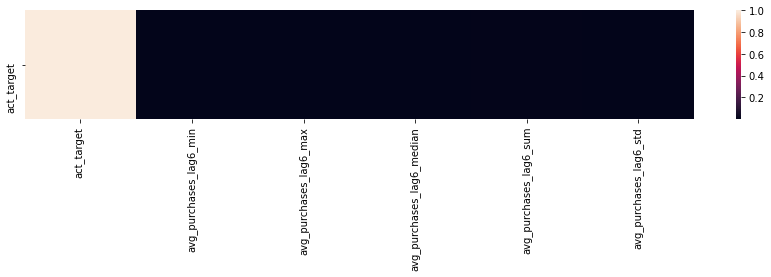

In [64]:
avg_purchases_lag6_df = createNumericalAggr(merge_df,'card_id','avg_purchases_lag6')
purchases_lag6_df = pd.merge(nout_train_df,avg_purchases_lag6_df,on='card_id',how='left')
fig,ax = plt.subplots(figsize=(15,2))
sns.heatmap(abs(purchases_lag6_df.corr())[['act_target']].T,ax=ax)

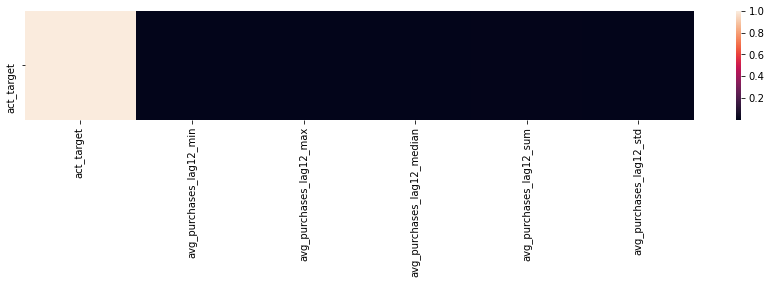

In [65]:
avg_purchases_lag12_df = createNumericalAggr(merge_df,'card_id','avg_purchases_lag12')
purchases_lag12_df = pd.merge(nout_train_df,avg_purchases_lag12_df,on='card_id',how='left')
fig,ax = plt.subplots(figsize=(15,2))
sns.heatmap(abs(purchases_lag12_df.corr())[['act_target']].T,ax=ax)

## Analysis
* Same as that of avg_sales_lag

## 8. Checking correlation of aggregated functions on average sales lag over 3,6 and 12 months with target variable

In [22]:
merge_df['sum_avg_sales_lag'] = merge_df['avg_sales_lag3'] + merge_df['avg_sales_lag6'] + merge_df['avg_sales_lag12']
merge_df['mean_avg_sales_lag'] = (merge_df['avg_sales_lag3'] + merge_df['avg_sales_lag6'] + merge_df['avg_sales_lag12'])/3
merge_df['max_avg_sales_lag'] = merge_df[['avg_sales_lag3','avg_sales_lag6','avg_sales_lag12']].max(axis=1)
merge_df['min_avg_sales_lag'] = merge_df[['avg_sales_lag3','avg_sales_lag6','avg_sales_lag12']].min(axis=1)

## Assigning higher weightage to most recent lag and lower weightage to previous lags
merge_df['wt_avg_sales_lag'] = (0.5*merge_df['avg_sales_lag3'] + 0.3*merge_df['avg_sales_lag6'] + 0.2*merge_df['avg_sales_lag12'])/3

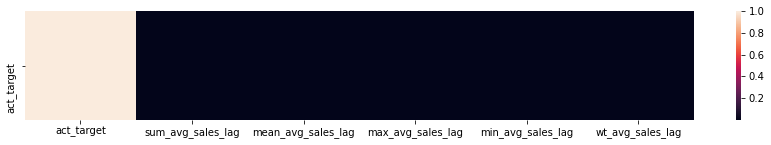

In [24]:
avg_sales_lag = pd.merge(nout_train_df,merge_df[['card_id','sum_avg_sales_lag','mean_avg_sales_lag','max_avg_sales_lag','min_avg_sales_lag','wt_avg_sales_lag']],on='card_id',how='left')
avg_sales_lag = avg_sales_lag[~avg_sales_lag.isnull()]
fig,ax = plt.subplots(figsize=(15,2))
sns.heatmap(abs(avg_sales_lag.corr())[['act_target']].T,ax = ax)

## Analysis
* Of all the new features that we created none of them shows high correlation with target variable.

## 9. Objective : Exploring Category_1,Category_2 and Category_4

* We can already see a lot of categorical columns which are common in both historical and merchant files
* Let's see if they contain the same set of values

In [70]:
print("Unique categories for category 1 : ",merge_df['category_1'].unique())
print("Unique categories for category 2 : ",merge_df['category_2'].unique())
print("Unique categories for category 4 : ",merge_df['category_4'].unique())

Unique categories for category 1 :  ['N' 'Y']
Unique categories for category 2 :  [ 3. nan  1.  4.  5.  2.]
Unique categories for category 4 :  ['N' 'Y']


* Category 1 and 2 have the same values as that in historical transactions.
* Category 4 has same categories as that of category 1.

In [71]:
merge_df[merge_df['category_1'] == merge_df['category_4']].shape[0]*100/merge_df.shape[0]

60.972696448449675

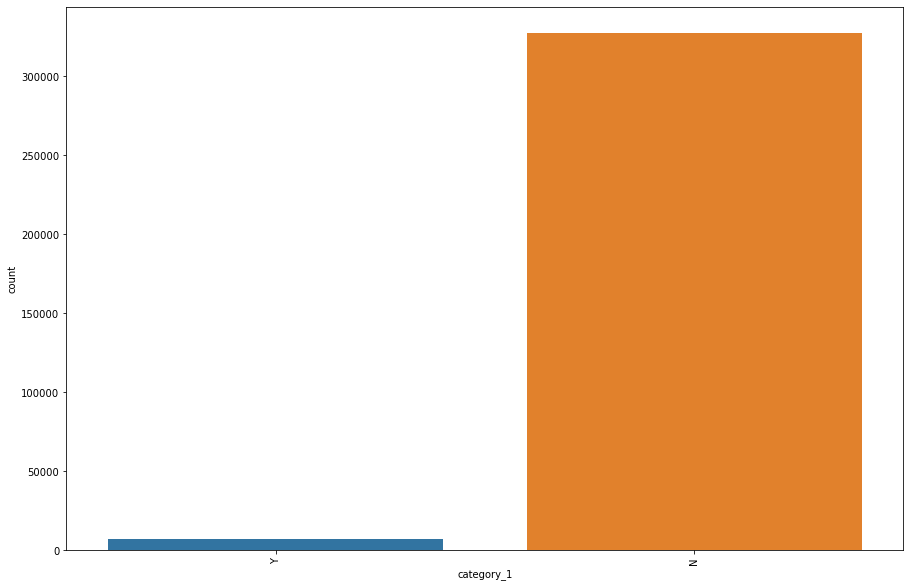

In [13]:
eda_fe.plotBarPlot(merchants_df,'category_1')

* Distribution of categories in Category_1 is skewed with majority of the values as 'N'.

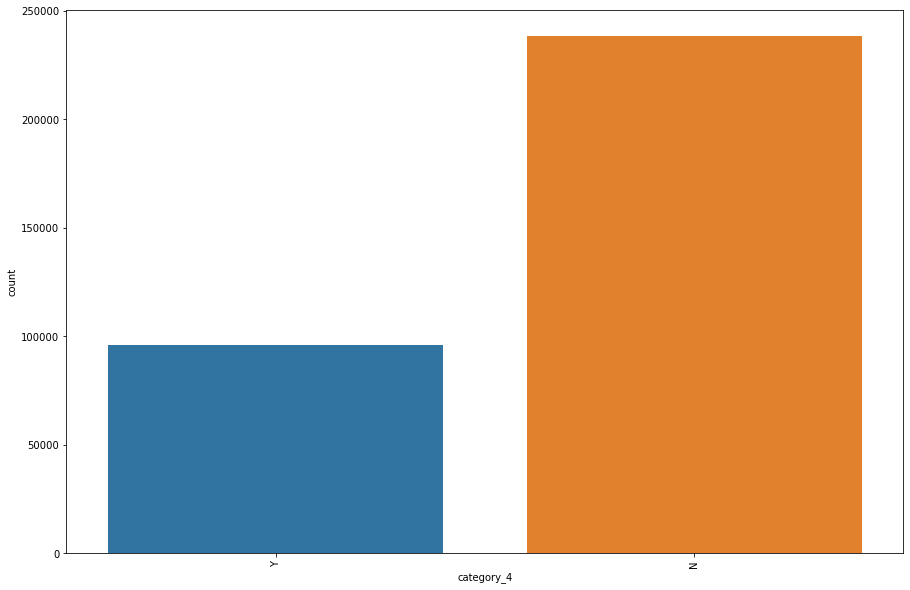

In [14]:
eda_fe.plotBarPlot(merchants_df,'category_4')

* Distribution of categories in Category_4 is also skewed with majority of the values as 'N'.

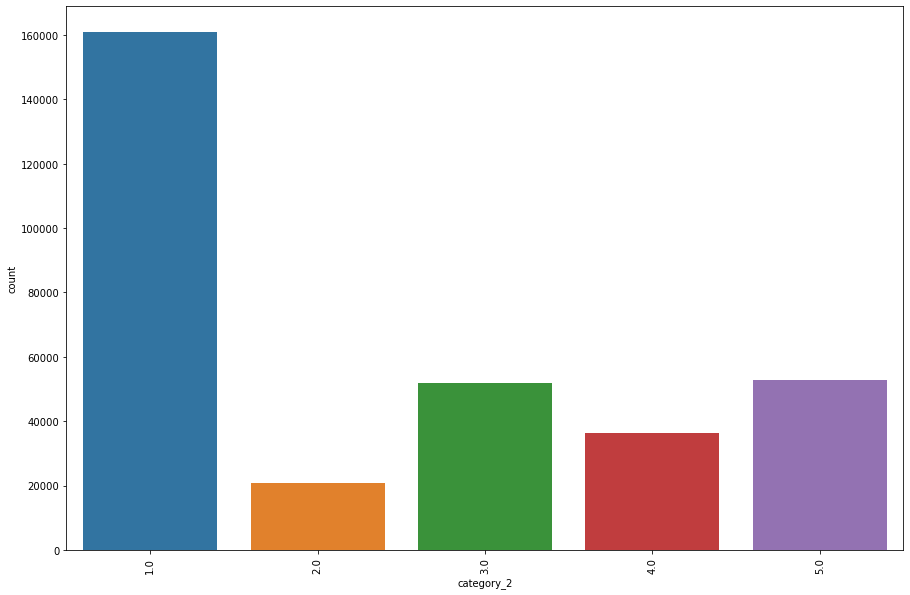

In [15]:
eda_fe.plotBarPlot(merchants_df,'category_2')

* Distribution is same as that of category_2 in historical transactions.

## 10. Objective : Explore Active months lag

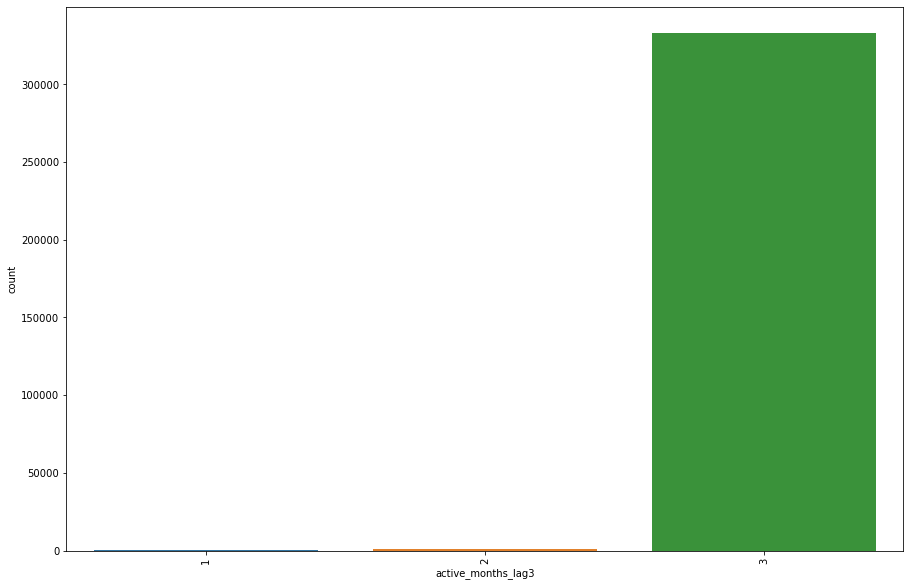

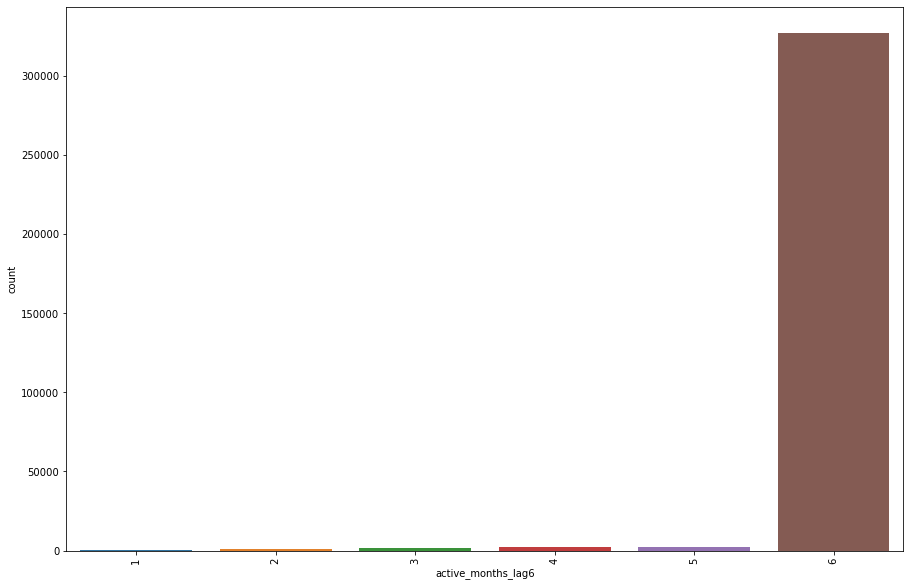

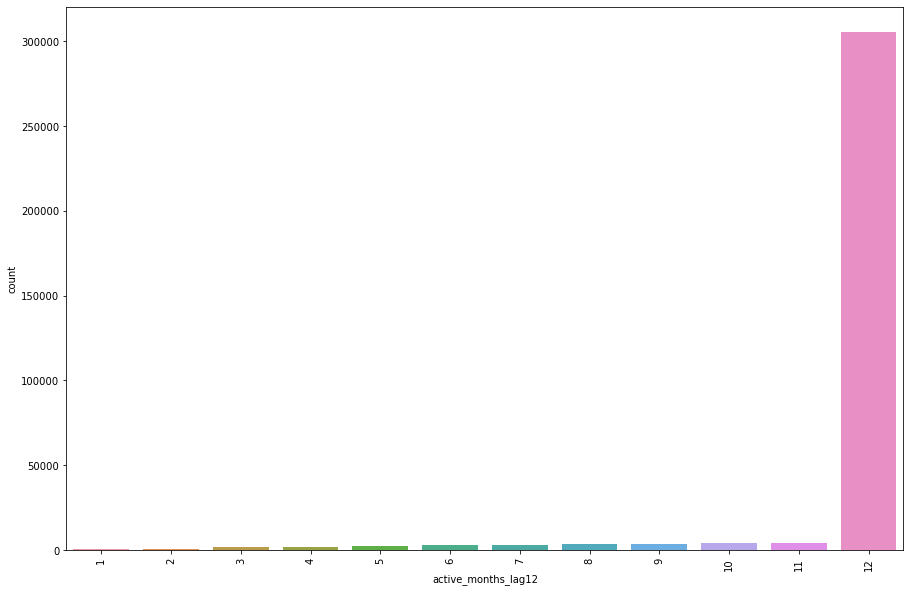

In [77]:
eda_fe.plotBarPlot(merchants_df,'active_months_lag3')
eda_fe.plotBarPlot(merchants_df,'active_months_lag6')
eda_fe.plotBarPlot(merchants_df,'active_months_lag12')

## Analysis
* Distribution of active month lag for all three categories is skewed.
* Which is understandable because it represents number of active months in the last 3,6 and 12 months which for the majority of the merchants has been the maximum.

## 10.1 Objective : Check relation between aggregated features(Modal) and target variable
* We'll be applying mode and nunique aggregation on this categorical variable with groupby on card_id as always.

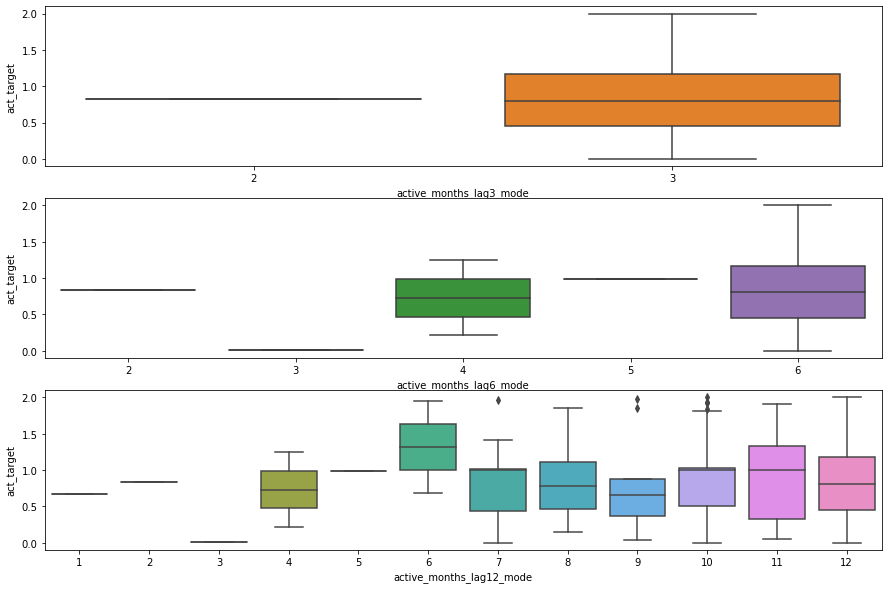

In [78]:
active_months_lag3_mode = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'active_months_lag3',mode_lambda_func,'mode')
active_months_lag6_mode = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'active_months_lag6',mode_lambda_func,'mode')
active_months_lag12_mode = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'active_months_lag12',mode_lambda_func,'mode')

fig,(ax1,ax2,ax3) = plt.subplots(nrows = 3,ncols = 1,figsize = (15,10))
sns.boxplot('active_months_lag3_mode','act_target',data = active_months_lag3_mode,ax = ax1)
sns.boxplot('active_months_lag6_mode','act_target',data = active_months_lag6_mode,ax = ax2)
sns.boxplot('active_months_lag12_mode','act_target',data = active_months_lag12_mode,ax = ax3)

## Analysis
* Statistical mode on categorical features suggests some variation in distribution of target variable.

## Conclusion
* This seems to be a good feature with some variance in distribution.

## 10.2 Check relation with target variable and nunique aggregated feature

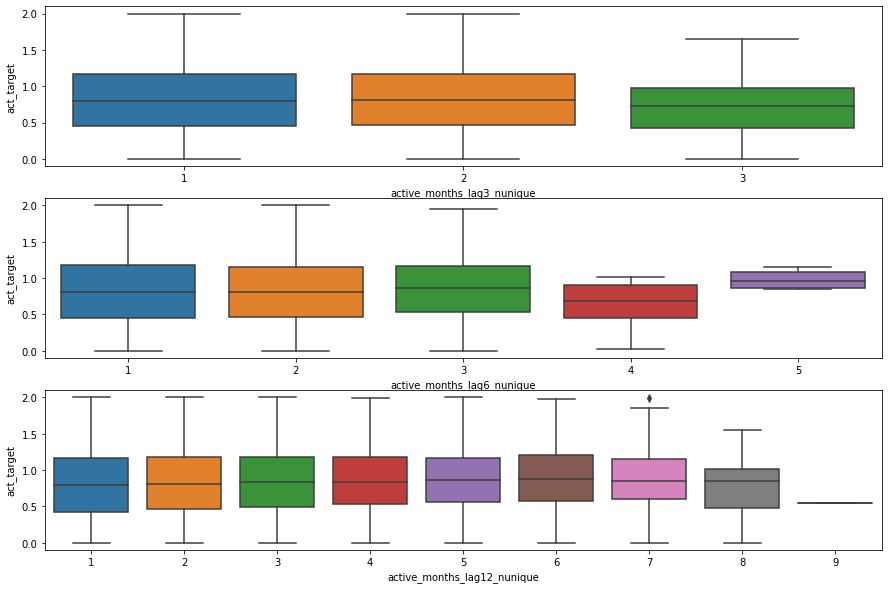

In [79]:
active_months_lag3_nunique = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'active_months_lag3',nunique_lambda_func,'nunique')
active_months_lag6_nunique = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'active_months_lag6',nunique_lambda_func,'nunique')
active_months_lag12_nunique = eda_fe.computeCategoricalAggr(nout_train_df,merge_df,'active_months_lag12',nunique_lambda_func,'nunique')

fig,(ax1,ax2,ax3) = plt.subplots(nrows = 3,ncols = 1,figsize = (15,10))
sns.boxplot('active_months_lag3_nunique','act_target',data = active_months_lag3_nunique,ax = ax1)
sns.boxplot('active_months_lag6_nunique','act_target',data = active_months_lag6_nunique,ax = ax2)
sns.boxplot('active_months_lag12_nunique','act_target',data = active_months_lag12_nunique,ax = ax3)

## Analysis
* While there is no much variation for active_months_lag3,lag6 and lag12 shows good variation of distribution with target variable.

## Conclusion
* Even above aggregation can be added to our feature set.

## 11. Objective : Explore Numerical_1 & Numerical_2
* Observe distribution of numerical_1 and numerical_2 feature.
* These attributes are normalized and anonymous in nature with no information provided about them in data dictionary.
* Check for correlation of aggregated features on numerical_1 and numerical_2 with actual target variable.

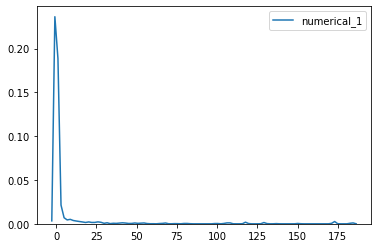

In [80]:
sns.kdeplot(merge_df['numerical_1'])

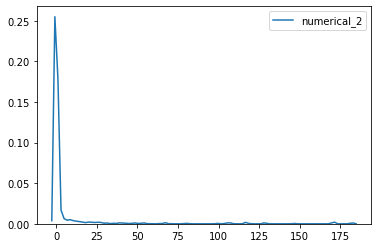

In [84]:
sns.kdeplot(merge_df['numerical_2'])

## Analysis
* Distribution is centered arounf 0 with few outliers on the extreme end.

In [81]:
num1_aggr_df = createNumericalAggr(merge_df,'card_id','numerical_1')
num2_aggr_df = createNumericalAggr(merge_df,'card_id','numerical_2')

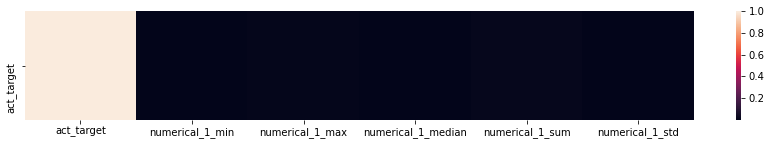

In [82]:
num1_aggr_df = pd.merge(nout_train_df,num1_aggr_df,on='card_id',how='inner')
fig,ax = plt.subplots(figsize=(15,2))
sns.heatmap(abs(num1_aggr_df.corr())[['act_target']].T,ax=ax)

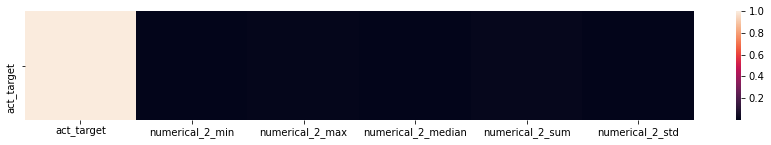

In [83]:
num2_aggr_df = pd.merge(nout_train_df,num2_aggr_df,on='card_id',how='inner')
fig,ax = plt.subplots(figsize=(15,2))
sns.heatmap(abs(num2_aggr_df.corr())[['act_target']].T,ax=ax)

## Analysis
* They don't show good correlation with target variable.

# Overall Analysis

## Strategies to merge merchants df and train_data

### 3. Some important points before we proceed with our analysis
* For analysis with target variable, we require to merge our aggregated information with card_id in train_df.
* Merchants_df doesn't have a card_id field in it and cannot be directly merged with train_df.
* Historical transactions have card_id,merchant_id,merchant_category_id and subsector_id.
* Information can be aggregated at various levels using the above merchant fields and then be combined with historical transactions so that it can later be merged with train_df but problem with this approach is that we have to perform multiple levels of aggregation or we can simply perform inner join on the above common fields and merge the historical transactions and merchants transactions.
* This can help us perform aggregation on just level in the merged_dataframe on card_id.

### Let's first pick only those transactions from historical transactions whose card_id's are present in train_df¶
* Here we will first select card_ids's from train_df with no outliers.(nout_train_df)
* We'll sample the historical transaction dataset using the above card_id's.(s_hist_df)
* We'll then create a new merged dataframe by performing inner join on s_hist_df and merchants_df with common keys(card_id,merchant_id,merchant_category_id,subsector_id) in both the dataset.
	
### Creating the merge_df which we'll be using throughout the notebook
* merge_df = pd.merge(s_hist_df,merchants_df,how='inner',left_on=['merchant_id','merchant_category_id','subsector_id'],right_on=['merchant_id','merchant_category_id','subsector_id'])	

### Features and their analysis
* most_recent_purchase_range,most_recent_sales_range : categorical values(A,E)<br>
	Applied categorical aggregation(mean,mode,min,max and nunique)<br>
	No significant observation<br>
	
* Average_sales,Average_purchases : lag_3,lag_6,lag_12 <br>
	Performed numerical aggregation with min,max,median,mean and standard deviation and checked correlation with target
    variable.<br>
	No significant observation.<br>
	
* Active_month_lag : 3,6,12<br>
	Distribution of active month lag for all three categories is skewed with majority value for the last month.<br>
	Which is understandable because it represents number of active months in the last 3,6 and 12 months which for the majority of the merchants has been the maximum.<br>
		
	<b>Statistical aggregation performed</b> : mode,nunique<br>
	<b>Analysis</b> : Good variance in distribution when compared to target variable. (checked with box plot)<br>
	<b>Conclusion</b> : Seems to be a good feature<br>
		
* Numerical features : Numerical_1,Numerical_2<br>
	Performed numerical aggregation<br>
	Not much strong association with the target variable.
	
	
	
	
	
	
